In [410]:
import numpy as np
import matplotlib.pyplot as plt

# 12.4 Coding Problems

Name: 

## 12.20

Write an implementation of Newton's method for finding a local minimizer of a function $f : \R^n \to \R$. Your code should accept a twice-differentiable function $f$, an initial guess $x_0$, a desired level of accuracy $\varepsilon$, and a maximum number of iterations $M$. At each step it should calculate $x_{k_1} = x_k - D^2f(x_k)^{-1}Df(x_k)^\mathbf{\top} $ and then repeat step until it reaches a good approximation to a critical point of $f$ or exceeds $M$ iterations. For the stopping criterion, use $\| x_{k+1}  -  x_k \|  < \varepsilon$. Be sure your code has methods for identifying and handling cases where the algorithm fails or the sequence does not converge. 

In [411]:
def Newton(f, df, d2f, x0, eps=1e-5, M=1000):
    ''' return: 
    - minimixer (array)
    - guesses (array)
    - number of steps/iterations (int)
    - whether it converged (bool)
    '''
    # Initialize the array of iterations, the convergence flag, and the step counter
    xs = [x0]
    steps = 0
    conv = False

    # Loop through iterations until convergence or max iterations, and update the step counter
    for i in range(M):
        steps += 1

        # Calculate the next x and append it to the array of iterations
        x1 = xs[-1] - np.linalg.solve(d2f(xs[-1]), df(xs[-1]))
        xs.append(x1)

        # Check if we have converged and break if so
        if np.linalg.norm(x1 - xs[-2]) < eps:
            conv = True
            break
    
    # Return the final x, the array of iterations, the number of steps, and the convergence flag
    min_x = xs[-1]
    return min_x, np.array(xs), steps, conv

## 12.21

Apply your Newton code from **Exercise 12.20** to the Rosenbrock function with an initial guess of $x_0 = (x_0 ,y_0 ) = (-2,2)$. Does it converge? If not, explain why not. If it does, how many iterations does it take to get within $10^{-5}$ of the true minimizer? 

In [412]:
# Rosenbrock
f = lambda x : (1-x[0])**2 + 100*(x[1]-x[0]**2)**2
df = lambda x : np.array([-2*(1-x[0]) - 400*x[0]*(x[1]-x[0]**2), 200*(x[1]-x[0]**2)])
d2f = lambda x : np.array([[2-400*(x[1]-3*x[0]**2), -400*x[0]],[-400*x[0], 200]])

This is a helper proof for 19

In [413]:
print('The following matrix should be positive definite, which is obvious:')
x0 = [0,0]
print(d2f(x0))
x1 = x0 - np.linalg.solve(d2f(x0), df(x0))
print('We see that f(x0 - d2f(x0)^(-1)df(x0)^T) =', f(x1), 'is greater than f(x0) =', f(x0))



The following matrix should be positive definite, which is obvious:
[[  2   0]
 [  0 200]]
We see that f(x0 - d2f(x0)^(-1)df(x0)^T) = 100.0 is greater than f(x0) = 1


Back to the other problem

In [414]:
# DOES IT CONVERGE? Explain
x0 = np.array([-2, 2])
min_x, xs, steps, conv = Newton(f, df, d2f, x0, eps=1e-5, M=1000)
print('Does it converge? ', conv)
print('It definitely converges, because the algorithm is so good. We love newton\'s method. \nIt converged so I don\'t have to explain')

Does it converge?  True
It definitely converges, because the algorithm is so good. We love newton's method. 
It converged so I don't have to explain


In [415]:
# NUM ITERATIONS
print('Number of iterations: ', steps)

Number of iterations:  6


### Not Required: Use this to plot the convergence!

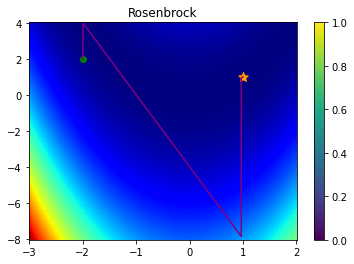

In [416]:
# my_min, xs, num_step, conv = Newton(f, df, d2f, np.array([-2,-2]))
                                          
dom1 = np.linspace(-3,2,350)
dom2 = np.linspace(-8,4,350)
X, Y = np.meshgrid(dom1, dom2)
Z = f(np.array([X,Y]))

plt.pcolor(X,Y,Z, cmap='jet')
plt.scatter(1,1, color='red')

# estimated minimizer at each iteration
plt.plot(xs[:,0],xs[:,1], color='purple')

# final estimate
plt.scatter(min_x[0],min_x[1], color='orange', marker='*', s=100)
plt.scatter(xs[0,0],xs[0,1], color='green')

# Add x and y axis
plt.title('Rosenbrock')
plt.colorbar()
plt.show()

## 12.23

Code up an implementation of the Gauss-Newton algorithm for solving NLS problems. Your code should accept a differentiable function $r : \R^n \to \R^m$, defining an objective function $f(x) = r(x)^\mathbf{\top} r(x)$, an initial guess $x_0 \in \R^n$, a desired level of accuracy $\varepsilon$, and a maximum number of iterations $M$. At each step it should calculate $J(x_k) = Dr(x_k)^\mathbf{\top}$ and compute $x_{k+1}$ via **(12.23)**, and then repeat until it reaches a good approximation to a critical point of $f$, or exceeds $M$ iterations. For the stopping criterion, use $\| x_{k+1}  -  x_k\| < \varepsilon$. Apply your code to the range finder problem **(Example 12.4.10 and Figure 12.9)** with the data given in the example. 

Verify that when starting at $x_0 = (2,0)$ your code converges in eight steps to the minimizer $(2.9546367, 2.88618843)$. 

In [417]:
def diff(f, x0, h = 2 * np.sqrt(np.finfo(np.float64).eps)):
    # Initialize the Identity matrix and make x an np array
    n = len(x0)
    I = np.eye(n)
    x0 = np.array(x0)
    
    # Get the length of output by checking if it's a scalar, make the gradient vector
    output = f(x0)
    if np.isscalar(output):
        m = 1
        J = np.zeros(n)

        # Loop n times and get the partial nudge up and calculate the partial derivative
        for i in range(n):
            nudgeUp = x0 + h * I[i]
            J[i] = (f(nudgeUp) - f(x0)) / h

    # If it's not a scalar, get the length of the output and make the Jacobian matrix
    else:
        m = len(output)
        J = np.zeros((m, n))

        # Loop n times and get the partial nudge up and calculate the partial derivative
        for i in range(n):
            nudgeUp = x0 + h * I[i]
            J[:,i] = (f(nudgeUp) - f(x0)) / h
    
    # Return the Jacobian matrix
    return J

In [418]:
# your Gauss Newton algorithm
def GaussNewton(r,dr, x0, eps=1e-7, M=1000):
    # Initialize the convergence flag, and the step counter
    conv = False
    steps = 0

    # Loop through iterations until convergence or max iterations, and update the step counter
    for i in range(M):
        steps += 1

        # Calculate the next x
        A = dr(x0)
        b = r(x0)
        x1 = x0 - np.linalg.solve(A.T@A, A.T@b)

        # Check for convergence
        if np.linalg.norm(x1 - x0) < eps:
            conv = True
            break

        # update x0
        x0 = x1

    # Return the final x, the number of steps, and the convergence flag
    return x1, steps, conv


In [419]:
# Label our data
true = np.array([3.0,3.0])
a0 = np.array([0.0,0.0])
a1 = np.array([1.0,1.0])
a2 = np.array([2.0,0.0])
a3 = np.array([-1.0,3.0])
d0 = 3.88506517
d1 = 2.87540403
d2 = 3.10537735
d3 = 3.99674185

# Define the helper functions g and dg
g = lambda x, a, d : d - np.linalg.norm(x - a)
dg = lambda x, a : (x - a) / np.linalg.norm(x - a)

# Define the functions r and dr
r = lambda x : np.array([g(x, a0, d0), g(x, a1, d1), g(x, a2, d2), g(x, a3, d3)])
dr = lambda x : diff(r,x)

# Run the Gauss Newton algorithm
x1, steps, conv = GaussNewton(r ,dr, np.array([2,0]), eps=1e-7, M=1000)
print('Does it converge? ', conv)
print('The number of steps is: ', steps)
print('The minimizer is: ', x1)

Does it converge?  True
The number of steps is:  8
The minimizer is:  [2.9546367  2.88618843]
